# Imports

In [56]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Questão 1 

##Upload Data

In [57]:
df = genfromtxt('breastcancer.csv', delimiter = ',')
np.random.seed(42)
np.random.shuffle(df)

In [58]:
df.shape

(569, 31)

In [59]:
def split_normalize(df, train_size):

  np.random.shuffle(df)
  n_train = int(df.shape[0]*train_size)
  train, test = df[:n_train,:], df[n_train:,:]

  X_train = train[:, :-1]
  y_train = train[:, -1]
  X_test = test[:, :-1]
  y_test = test[:, -1]

  # y_train = y_train.reshape(-1, 1)
  # y_test = y_test.reshape(-1, 1)

  X_max = np.max(X_train, axis = 0, keepdims=True)
  X_min = np.min(X_train, axis = 0, keepdims=True)

  X_train_norm = (X_train - X_min)/(X_max - X_min)
  X_test_norm = (X_test - X_min)/(X_max - X_min)
  X_train_norm[:, 0] = 1
  X_test_norm[:, 0] = 1

  return X_train_norm, X_test_norm, y_train, y_test

In [60]:
X_train, X_test, y_train, y_test = split_normalize(df, 0.8)

## Regressão Logística 

In [69]:
class Logistic_LinearRegression:

  def __init__(self, learning_rate=0.01, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.c_errors = []
    self.c_epoches = []

  def sigmoid(self, z):
    return 1.0/(1 + np.exp(-z))

  def init_params(self):
    self.weights = np.zeros((self.n_features, 1))
    self.bias = 0

  def get_prediction(self, X):  
    return self.sigmoid((X @ self.weights) + self.bias)

  def get_gradients(self, X, y, y_pred):
    error = y_pred - y
    dw = (1 / self.n_samples) * np.dot(X.T, error)
    db = (1 / self.n_samples) * np.sum(error)
    self.c_errors.append(db)
    return dw, db

  def update_params(self, dw, db):
    self.weights -= self.lr * dw
    self.bias -= self.lr * db

  def fit(self, X, y):
    count = 0
    self.n_samples, self.n_features = X.shape
    self.init_params()
    y = y.reshape(self.n_samples, 1)
    for iter in range(self.n_iters):
      count += 1
      self.c_epoches.append(count)
      y_pred = self.get_prediction(X)
      dw, db = self.get_gradients(X, y, y_pred) #derivate of the weights and bias
      self.update_params(dw, db)
      if count % 100 == 0:
        y_pred = [1 if i > 0.5 else 0 for i in y_pred]
        ga, oa, za = self.calc_acc(y, y_pred)
        print('=-'*6)
        print('Acurácia Geral:', ga)
        print('Acurácia p/ classe 1:', oa)
        print('Acurácia p/ classe 0:', za)
    print('\n Gráfico do erro no treino')
    self.generate_train_plot(self.c_epoches, self.c_errors)

  def fit_kfolds(self, X, y):
    count = 0
    self.n_samples, self.n_features = X.shape
    self.init_params()
    y = y.reshape(self.n_samples, 1)
    for iter in range(self.n_iters):
      count += 1
      self.c_epoches.append(count)
      y_pred = self.get_prediction(X)
      dw, db = self.get_gradients(X, y, y_pred) #derivate of the weights and bias
      self.update_params(dw, db)
      if count % 100 == 0:
        y_pred = [1 if i > 0.5 else 0 for i in y_pred]
        ga, oa, za = self.calc_acc(y, y_pred)
        return ga, oa, za
  
  def calc_acc(self, y, y_pred):
    """
    caso preciese ter somente a acurácia geral, mais rápido aqui
    y_pred_arr = np.array(y_pred).reshape(-1, 1)
    check = y_pred_arr == y
    check_res = np.count_nonzero(check == True)
    acc = round((check_res/y.shape[0])*100, 2)
    return acc
    """
    total_hits = 0
    one_hits = 0
    zero_hits = 0
    len_one = np.count_nonzero(y == 1)
    len_zero = np.count_nonzero(y == 0)
    for i in range(len(y)):
      if y_pred[i] == y[i]:
        total_hits += 1
        if y[i] == 1:
          one_hits += 1
        else:
          zero_hits += 1
    geral_acc = round((total_hits/y.shape[0])*100, 2)
    class_1 = round((one_hits/len_one), 2)
    class_0 = round((zero_hits/len_zero), 2)

    return geral_acc, class_1, class_0

  def predict(self, X):
    y_pred = self.get_prediction(X)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in y_pred]
    return np.array(pred_class)

  def generate_train_plot(self, count_epochs, count_errors):
    plt.plot(count_epochs, count_errors, color='red', label='Train Error')
    plt.ylabel('Error')
    plt.xlabel('Épocas')
    plt.legend()
    plt.show()

    """
    Classe 0 é a que tem mais amostras, mas acc perfeita já no início ?
    """

=-=-=-=-=-=-
Acurácia Geral: 63.74
Acurácia p/ classe 1: 0.01
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 66.59
Acurácia p/ classe 1: 0.09
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 71.87
Acurácia p/ classe 1: 0.23
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 77.36
Acurácia p/ classe 1: 0.38
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 81.76
Acurácia p/ classe 1: 0.5
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 85.27
Acurácia p/ classe 1: 0.6
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 86.59
Acurácia p/ classe 1: 0.64
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 87.91
Acurácia p/ classe 1: 0.68
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 88.57
Acurácia p/ classe 1: 0.69
Acurácia p/ classe 0: 1.0
=-=-=-=-=-=-
Acurácia Geral: 89.23
Acurácia p/ classe 1: 0.71
Acurácia p/ classe 0: 1.0

 Gráfico do erro no treino


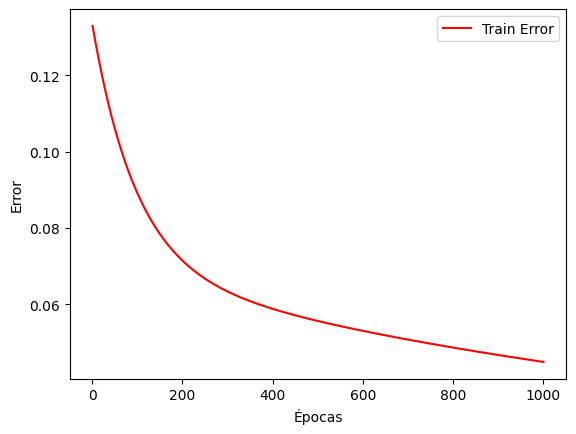

In [ ]:
bilr = Logistic_LinearRegression()
bilr.fit(X_train, y_train)

## Análise do Discriminante Gaussiano

Comecei sem conseguir fazer a implementação completa por causa do cálculo para encontrar p(X|y) aí usei a o módulo multivariate normal da lib do scipy, tem outra com o cálculo mesmo mas como não está com um resultado tão bom, deixei os 2. Para os testes com o kfolds estou usando a primeira implementação, nas 2 questões.

In [67]:
class GaussianDiscriminantAnalysis:

  def init_params(self):  
      self.mu = np.zeros((self.n_class, self.n_features))
      self.sigma = np.zeros((self.n_class, self.n_features, self.n_features))
      self.phi = np.zeros(self.n_class)

  def fit(self, X_train, y_train):
      self.n_samples, self.n_features = X_train.shape
      X_train = X_train.reshape(self.n_samples, -1)
      self.n_features = X_train.shape[1]
      self.n_class = len(np.unique(y_train.reshape(-1)))

      self.init_params()

      for label in range(self.n_class):
          indices = (y_train == label)         
          self.phi[label] = float(np.sum(indices)) / self.n_samples 
          self.mu[label] = np.mean(X_train[indices, :], axis=0) #médias 
          self.sigma[label] = np.cov(X_train[indices, :], rowvar=0) #matrizes de cov
      
      return self.phi, self.mu, self.sigma

  def predict(self, X_tests, phi, mu, sigma):
      X_tests = X_tests.reshape(X_tests.shape[0], -1)
      scores = np.zeros((X_tests.shape[0], self.n_class)) 
      for label in range(self.n_class): 
          normal_distribution_prob = multivariate_normal(mu[label], sigma[label], allow_singular=True)
          for i, x_test in enumerate(X_tests):
              scores[i, label] = np.log(phi[label]) + normal_distribution_prob.logpdf(x_test)
      predictions = np.argmax(scores, axis=1)
      return predictions

  def calc_acc(self, y, y_pred):
    total_hits = 0
    one_hits = 0
    zero_hits = 0
    len_one = np.count_nonzero(y == 1)
    len_zero = np.count_nonzero(y == 0)
    for i in range(y.shape[0]):
      if y_pred[i] == y[i]:
        total_hits += 1
        if y[i] == 1:
          one_hits += 1
        else:
          zero_hits += 1
    geral_acc = round((total_hits/y.shape[0])*100, 2)
    class_1 = round((one_hits/len_one), 2)
    class_0 = round((zero_hits/len_zero), 2)

    return geral_acc, class_1, class_0


In [ ]:
gda = GaussianDiscriminantAnalysis()

phi, mu, sigma = gda.fit(X_train, y_train)
y_pred = gda.predict(X_test, phi, mu, sigma)
ga, oa, za = gda.calc_acc(y_test, y_pred)
print('Acurácia Geral:', ga)
print('Acurácia p/ classe 1:', oa)
print('Acurácia p/ classe 0:', za)

Acurácia Geral: 94.74
Acurácia p/ classe 1: 0.93
Acurácia p/ classe 0: 0.96


In [65]:
def gda_calc(X_train, y_train, y_test):
  gda = GaussianDiscriminantAnalysis()
  phi, mu, sigma = gda.fit(X_train, y_train)
  y_pred = gda.predict(X_test, phi, mu, sigma)
  ga, oa, za = gda.calc_acc(y_test, y_pred)
  return ga, oa, za

In [16]:
def fit(X, y):
    classes = np.unique(y)
    mean_vectors = []
    cov_matrices = []
    for cl in classes:
        X_cl = X[y == cl]
        mean_vectors.append(np.mean(X_cl, axis=0))
        cov_matrices.append((X_cl - mean_vectors[-1]).T.dot(X_cl - mean_vectors[-1]) + 0.00001 / (X_cl.shape[0]-1)) ##somando uma sujeirinha pra n dar erro
    return mean_vectors, cov_matrices

def predict(X, mean_vectors, cov_matrices):
    y_pred = []
    for x in X:
        max_prob = -1
        predicted_class = None
        for i in range(len(mean_vectors)):
            mv = mean_vectors[i]
            cm = cov_matrices[i]
            diff = x - mv
            prob = np.exp(-0.5 * diff.dot(np.linalg.inv(cm)).dot(diff.T)) / np.sqrt(np.linalg.det(cm))
            if prob > max_prob:
                max_prob = prob
                predicted_class = i
        y_pred.append(predicted_class)
    return y_pred


mean_vectors, cov_matrices = fit(X_train, y_train) #média e matriz de covariância para cada classe
y_pred = predict(X_test, mean_vectors, cov_matrices)

total_hits = 0
one_hits = 0
zero_hits = 0
len_one = np.count_nonzero(y_test == 1)
len_zero = np.count_nonzero(y_test == 0)
for i in range(y_test.shape[0]):
  if y_pred[i] == y_test[i]:
    total_hits += 1
    if y_test[i] == 1:
      one_hits += 1
    else:
      zero_hits += 1
geral_acc = round((total_hits/y_test.shape[0])*100, 2)
class_1 = round((one_hits/len_one), 2)
class_0 = round((zero_hits/len_zero), 2)

print('Acurácia Geral:', geral_acc)
print('Acurácia p/ classe 1:', class_1)
print('Acurácia p/ classe 0:', class_0)

Acurácia Geral: 61.4
Acurácia p/ classe 1: 0.04
Acurácia p/ classe 0: 1.0


## Naive Bayes Gaussiano


In [52]:
class GaussianNaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        # probabilida posterior p/ cada classe
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x, 0.001)))
            posterior = posterior + prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x, lbda): #Probability density function
        mean = self._mean[class_idx]
        var = self._var[class_idx] + lbda
        numerator = np.exp(-((x - mean) ** 2)  / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [55]:
nb = GaussianNaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

def accuracy(y_true, y_pred):
  total_hits = 0
  one_hits = 0
  zero_hits = 0
  len_one = np.count_nonzero(y_true == 1)
  len_zero = np.count_nonzero(y_true == 0)
  for i in range(y_true.shape[0]):
    if y_pred[i] == y_true[i]:
      total_hits += 1
      if y_true[i] == 1:
        one_hits += 1
      else:
        zero_hits += 1
  geral_acc = round((total_hits/y_true.shape[0])*100, 2)
  class_1 = round((one_hits/len_one), 2)
  class_0 = round((zero_hits/len_zero), 2)
  return geral_acc, class_1, class_0

ga, oa, za = accuracy(y_test, predictions)
print('Acurácia Geral:', geral_acc)
print('Acurácia p/ classe 1:', class_1)
print('Acurácia p/ classe 0:', class_0)

Acurácia Geral: 61.4
Acurácia p/ classe 1: 0.04
Acurácia p/ classe 0: 1.0


In [64]:
def gnb_calc(X_train, y_train, y_test):
  nb = GaussianNaiveBayes()
  nb.fit(X_train, y_train)
  predictions = nb.predict(X_test)
  total_hits = 0
  one_hits = 0
  zero_hits = 0
  len_one = np.count_nonzero(y_test == 1)
  len_zero = np.count_nonzero(y_test == 0)
  for i in range(y_test.shape[0]):
    if predictions[i] == y_test[i]:
      total_hits += 1
      if y_test[i] == 1:
        one_hits += 1
      else:
        zero_hits += 1
  geral_acc = round((total_hits/y_test.shape[0])*100, 2)
  class_1 = round((one_hits/len_one), 2)
  class_0 = round((zero_hits/len_zero), 2)
  return geral_acc, class_1, class_0

## Resposta

In [78]:
k_folds = 10
n_samples = df.shape[0]
part_0 = 0
part_1 = n_samples // k_folds
part_final = n_samples % k_folds

train = []
test = []

for i in range(k_folds):
  if part_final > 0:
    part_final = part_final - 1
    te = df[part_0 : part_0 + part_1 + 1]
    tr = np.r_[df[0 : part_0], df[part_0 + part_1 + 1 : ]]
    part_0 = part_0 + part_1 + 1
  else:
    te = df[part_0 : part_0 + part_1]
    tr = np.r_[df[0 : part_0], df[part_0 + part_1 : ]]
    part_0 = part_0 + part_1 + 1
  train.append(tr)
  test.append(te)

lin_reg = []
Gaus_disc_an = []
Gaus_naive_bayes = []

bilr = Logistic_LinearRegression()
gda = GaussianDiscriminantAnalysis()

for i in range(k_folds):
  tr = train[i]
  te = test[i]
  X_train = tr[ : , : -1]
  X_test = te[ : , : -1]
  y_train = tr[ : , -1]
  y_test = te[ : , -1]
  
  lin_reg.append(bilr.fit_kfolds(X_train, y_train))
  Gaus_disc_an.append(gda_calc(X_train, y_train, y_test))
  Gaus_naive_bayes.append(gnb_calc(X_train, y_train, y_test))

for i in range(k_folds):
  print("=-"*20)
  print("-Fold: ", i+1)
  print("\n")
  print("---Regressão Logística---")
  print("Acurácia Geral:", lin_reg[i][0])
  print("Acurácia p/ Classe 1:", lin_reg[i][1])
  print("Acurácia p/ Classe 2:", lin_reg[i][2])
  print("\n")
  print("---Análise do Discriminante Gaussiano---")
  print("Acurácia Geral:", Gaus_disc_an[i][0])
  print("Acurácia p/ Classe 1:", Gaus_disc_an[i][1])
  print("Acurácia p/ Classe 2:", Gaus_disc_an[i][2])
  print("\n")
  print("---Naive Bayes Gaussiano---")
  print("Acurácia Geral:", Gaus_naive_bayes[i][0])
  print("Acurácia p/ Classe 1:", Gaus_naive_bayes[i][1])
  print("Acurácia p/ Classe 2:", Gaus_naive_bayes[i][2])
  print("\n")

<ipython-input-69-6c9661e4d7c0>:12: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-52-ee4ec023d328>:28: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x, 0.001)))


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
-Fold:  1


---Regressão Logística---
Acurácia Geral: 36.52
Acurácia p/ Classe 1: 1.0
Acurácia p/ Classe 2: 0.0


---Análise do Discriminante Gaussiano---
Acurácia Geral: 94.74
Acurácia p/ Classe 1: 0.96
Acurácia p/ Classe 2: 0.94


---Naive Bayes Gaussiano---
Acurácia Geral: 96.49
Acurácia p/ Classe 1: 0.96
Acurácia p/ Classe 2: 0.97


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
-Fold:  2


---Regressão Logística---
Acurácia Geral: 37.89
Acurácia p/ Classe 1: 1.0
Acurácia p/ Classe 2: 0.0


---Análise do Discriminante Gaussiano---
Acurácia Geral: 92.98
Acurácia p/ Classe 1: 0.83
Acurácia p/ Classe 2: 0.97


---Naive Bayes Gaussiano---
Acurácia Geral: 96.49
Acurácia p/ Classe 1: 0.89
Acurácia p/ Classe 2: 1.0


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
-Fold:  3


---Regressão Logística---
Acurácia Geral: 71.09
Acurácia p/ Classe 1: 0.23
Acurácia p/ Classe 2: 1.0


---Análise do Discriminante Gaussiano---
Acurácia Geral: 94.74
Acurácia p/ Classe 1: 

# Questão 2 

##Upload Data

In [185]:
df = genfromtxt('vehicle.csv', delimiter = ',')
np.random.seed(42)
np.random.shuffle(df)

In [186]:
df.shape

(846, 19)

In [187]:
def split_normalize(df, train_size):

  np.random.shuffle(df)
  n_train = int(df.shape[0]*train_size)
  train, test = df[:n_train,:], df[n_train:,:]

  X_train = train[:, :-1]
  y_train = train[:, -1]
  X_test = test[:, :-1]
  y_test = test[:, -1]

  # y_train = y_train.reshape(-1, 1)
  # y_test = y_test.reshape(-1, 1)

  X_max = np.max(X_train, axis = 0, keepdims=True)
  X_min = np.min(X_train, axis = 0, keepdims=True)

  X_train_norm = (X_train - X_min)/(X_max - X_min)
  X_test_norm = (X_test - X_min)/(X_max - X_min)
  X_train_norm[:, 0] = 1
  X_test_norm[:, 0] = 1

  return X_train_norm, X_test_norm, y_train, y_test

In [188]:
X_train, X_test, y_train, y_test = split_normalize(df, 0.8)

## Regressão SoftMax

In [189]:
class SoftmaxRegression:
  def __init__(self, n_iter=3000, lr=0.01):
      self.n_iter = n_iter
      self.lr = lr

  def Softmax(self, X):
    exp_X = np.exp(X - np.max(X, axis=1, keepdims=True)) 
    return exp_X / np.sum(exp_X, axis=1, keepdims=True)

  def OneHotEncoder(self, y):
    n_samples = y.shape[0]
    categories = np.unique(y)

    mappings = {}
    for id, category in enumerate(categories):
        mappings[category] = id

    one_hot_array = np.zeros((n_samples, len(categories)))
    for row_number, instance in enumerate(y):
        one_hot_array[row_number, mappings[instance]] = 1

    return one_hot_array
    
  def get_gradients(self):
    self.gradients = self.X.T.dot(self.y_preds - self.OneHotEncoder(self.y))  

  def update_weights(self):
    self.coef_ -= self.lr * self.gradients

  def fit(self, X, y):
      #Fazendo X_0 = 1 para o bias.
      X = np.insert(X, 0, 1, axis=1)
      n_features = X.shape[1]
      n_classes = len(np.unique(y))

      limit = np.sqrt(2 / n_features)
      self.coef_ = np.random.uniform(-limit, limit, (n_features, n_classes))

      for _ in range(self.n_iter):
            y_preds = self.Softmax(X.dot(self.coef_))
            gradients = X.T.dot(y_preds - self.OneHotEncoder(y))
            self.coef_ -= self.lr * gradients 

      return self

  def predict(self, X):
      #Fazendo X_0 = 1 para o bias.
      X = np.insert(X, 0, 1, axis=1)
      prob = self.Softmax(X.dot(self.coef_))
      return np.argmax(prob, axis=1)

  def predict_proba(self, X):
      #Fazendo X_0 = 1 para o bias.
      X = np.insert(X, 0, 1, axis=1)
      prob = self.Softmax(X.dot(self.coef_))
      return prob

In [190]:
from sklearn.metrics import accuracy_score

clf = SoftmaxRegression()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

# Compute accuracy of predictions.
score = accuracy_score(y_test, y_preds)
score

0.6529411764705882

In [191]:
def accuracy(y_true, y_pred):
  total_hits = 0
  three_hits = 0
  two_hits = 0
  one_hits = 0
  zero_hits = 0
  len_zero = np.count_nonzero(y_true == 0)
  len_one = np.count_nonzero(y_true == 1)
  len_two = np.count_nonzero(y_true == 2)
  len_three = np.count_nonzero(y_true == 3)

  for i in range(len(y_true)):
    if y_pred[i] == y_true[i]:
      total_hits += 1
      if y_true[i] == 0:
        zero_hits += 1
      if y_true[i] == 1:
        one_hits += 1
      if y_true[i] == 1:
        two_hits += 1
      if y_true[i] == 1:
        three_hits += 1

  geral_acc = round((total_hits/len(y_true))*100, 2)
  class_0 = round((zero_hits/len_zero), 2)
  class_1 = round((one_hits/len_one), 2)
  class_2 = round((two_hits/len_two), 2)
  class_3 = round((three_hits/len_three), 2)
  return geral_acc, class_0, class_1, class_2, class_3

clf = SoftmaxRegression()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

ga, ze_a, on_a, tw_a, th_a = accuracy(y_test, y_preds)

print('Acurácia Geral:', ga)
print('Acurácia p/ classe 0:', ze_a)
print('Acurácia p/ classe 1:', on_a)
print('Acurácia p/ classe 2:', tw_a)
print('Acurácia p/ classe 3:', th_a)

Acurácia Geral: 65.29
Acurácia p/ classe 0: 0.93
Acurácia p/ classe 1: 0.0
Acurácia p/ classe 2: 0.0
Acurácia p/ classe 3: 0.0


In [192]:
def softmax_regr(X_train, X_test, y_test):
  sre.fit(X_train, y_train)
  y_preds = sre.predict(X_test)

  total_hits = 0
  three_hits = 0
  two_hits = 0
  one_hits = 0
  zero_hits = 0
  len_zero = np.count_nonzero(y_test == 0)
  len_one = np.count_nonzero(y_test == 1)
  len_two = np.count_nonzero(y_test == 2)
  len_three = np.count_nonzero(y_test == 3)

  for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
      total_hits += 1
      if y_test[i] == 0:
        zero_hits += 1
      if y_test[i] == 1:
        one_hits += 1
      if y_test[i] == 1:
        two_hits += 1
      if y_test[i] == 1:
        three_hits += 1
        
  geral_acc = round((total_hits/len(y_test))*100, 2)
  class_0 = round((zero_hits/len_zero), 2)
  class_1 = round((one_hits/len_one), 2)
  class_2 = round((two_hits/len_two), 2)
  class_3 = round((three_hits/len_three), 2)
  return geral_acc, class_0, class_1, class_2, class_3

## Análise do Discriminante Gaussiano

In [193]:
class GaussianDiscriminantAnalysis:

  def init_params(self):  
      self.mu = np.zeros((self.n_class, self.n_features))
      self.sigma = np.zeros((self.n_class, self.n_features, self.n_features))
      self.phi = np.zeros(self.n_class)

  def fit(self, X_train, y_train):
      self.n_samples, self.n_features = X_train.shape
      X_train = X_train.reshape(self.n_samples, -1)
      self.n_features = X_train.shape[1]
      self.n_class = len(np.unique(y_train.reshape(-1)))

      self.init_params()

      for label in range(self.n_class):
          indices = (y_train == label)         
          self.phi[label] = float(np.sum(indices)) / self.n_samples 
          self.mu[label] = np.mean(X_train[indices, :], axis=0) #médias 
          self.sigma[label] = np.cov(X_train[indices, :], rowvar=0) #matrizes de cov
      
      return self.phi, self.mu, self.sigma

  def predict(self, X_tests, phi, mu, sigma):
      X_tests = X_tests.reshape(X_tests.shape[0], -1)
      scores = np.zeros((X_tests.shape[0], self.n_class)) 
      for label in range(self.n_class): 
          normal_distribution_prob = multivariate_normal(mu[label], sigma[label], allow_singular=True)
          for i, x_test in enumerate(X_tests):
              scores[i, label] = np.log(phi[label]) + normal_distribution_prob.logpdf(x_test)
      predictions = np.argmax(scores, axis=1)
      return predictions

  def calc_acc(self, y_true, y_pred):
    total_hits = 0
    three_hits = 0
    two_hits = 0
    one_hits = 0
    zero_hits = 0
    len_zero = np.count_nonzero(y_true == 0)
    len_one = np.count_nonzero(y_true == 1)
    len_two = np.count_nonzero(y_true == 2)
    len_three = np.count_nonzero(y_true == 3)

    for i in range(len(y_true)):
      if y_pred[i] == y_true[i]:
        total_hits += 1
        if y_true[i] == 0:
          zero_hits += 1
        if y_true[i] == 1:
          one_hits += 1
        if y_true[i] == 1:
          two_hits += 1
        if y_true[i] == 1:
          three_hits += 1
          
    geral_acc = round((total_hits/len(y_true))*100, 2)
    class_0 = round((zero_hits/len_zero), 2)
    class_1 = round((one_hits/len_one), 2)
    class_2 = round((two_hits/len_two), 2)
    class_3 = round((three_hits/len_three), 2)
    return geral_acc, class_0, class_1, class_2, class_3


In [194]:
gda = GaussianDiscriminantAnalysis()

phi, mu, sigma = gda.fit(X_train, y_train)
y_pred = gda.predict(X_test, phi, mu, sigma)
ga, ze_a, on_a, tw_a, th_a  = gda.calc_acc(y_test, y_pred)
print('Acurácia Geral:', ga)
print('Acurácia p/ classe 0:', ze_a)
print('Acurácia p/ classe 1:', on_a)
print('Acurácia p/ classe 2:', tw_a)
print('Acurácia p/ classe 3:', th_a)

Acurácia Geral: 88.82
Acurácia p/ classe 0: 0.98
Acurácia p/ classe 1: 0.76
Acurácia p/ classe 2: 0.79
Acurácia p/ classe 3: 0.94


In [195]:
def gda_calc(X_train, y_train, y_test):
  gda = GaussianDiscriminantAnalysis()
  phi, mu, sigma = gda.fit(X_train, y_train)
  y_pred = gda.predict(X_test, phi, mu, sigma)
  ga, ze_a, on_a, tw_a, th_a = gda.calc_acc(y_test, y_pred)
  return ga, ze_a, on_a, tw_a, th_a

## Naive Bayes Gaussiano


In [196]:
class GaussianNaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []
        # probabilida posterior p/ cada classe
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x, 0.001)))
            posterior = posterior + prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x, lbda): #Probability density function
        mean = self._mean[class_idx]
        var = self._var[class_idx] + lbda
        numerator = np.exp(-((x - mean) ** 2)  / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [197]:
nb = GaussianNaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

def accuracy(y_true, y_pred):
  total_hits = 0
  three_hits = 0
  two_hits = 0
  one_hits = 0
  zero_hits = 0
  len_zero = np.count_nonzero(y_true == 0)
  len_one = np.count_nonzero(y_true == 1)
  len_two = np.count_nonzero(y_true == 2)
  len_three = np.count_nonzero(y_true == 3)

  for i in range(len(y_true)):
    if y_pred[i] == y_true[i]:
      total_hits += 1
      if y_true[i] == 0:
        zero_hits += 1
      if y_true[i] == 1:
        one_hits += 1
      if y_true[i] == 1:
        two_hits += 1
      if y_true[i] == 1:
        three_hits += 1
        
  geral_acc = round((total_hits/len(y_true))*100, 2)
  class_0 = round((zero_hits/len_zero), 2)
  class_1 = round((one_hits/len_one), 2)
  class_2 = round((two_hits/len_two), 2)
  class_3 = round((three_hits/len_three), 2)
  return geral_acc, class_0, class_1, class_2, class_3

ga, ze_a, on_a, tw_a, th_a = accuracy(y_test, predictions)

print('Acurácia Geral:', ga)
print('Acurácia p/ classe 0:', ze_a)
print('Acurácia p/ classe 1:', on_a)
print('Acurácia p/ classe 2:', tw_a)
print('Acurácia p/ classe 3:', th_a)

Acurácia Geral: 45.88
Acurácia p/ classe 0: 0.07
Acurácia p/ classe 1: 0.47
Acurácia p/ classe 2: 0.49
Acurácia p/ classe 3: 0.58


In [198]:
def gnb_calc(X_train, y_train, y_test):

  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)

  total_hits = 0
  three_hits = 0
  two_hits = 0
  one_hits = 0
  zero_hits = 0
  len_zero = np.count_nonzero(y_test == 0)
  len_one = np.count_nonzero(y_test == 1)
  len_two = np.count_nonzero(y_test == 2)
  len_three = np.count_nonzero(y_test == 3)

  for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
      total_hits += 1
      if y_test[i] == 0:
        zero_hits += 1
      if y_test[i] == 1:
        one_hits += 1
      if y_test[i] == 1:
        two_hits += 1
      if y_test[i] == 1:
        three_hits += 1
        
  geral_acc = round((total_hits/len(y_test))*100, 2)
  class_0 = round((zero_hits/len_zero), 2)
  class_1 = round((one_hits/len_one), 2)
  class_2 = round((two_hits/len_one), 2)
  class_3 = round((three_hits/len_one), 2)
  return geral_acc, class_0, class_1, class_2, class_3

## Resposta

In [199]:
k_folds = 10
n_samples = df.shape[0]
part_0 = 0
part_1 = n_samples // k_folds
part_final = n_samples % k_folds

train = []
test = []

for i in range(k_folds):
  if part_final > 0:
    part_final = part_final - 1
    te = df[part_0 : part_0 + part_1 + 1]
    tr = np.r_[df[0 : part_0], df[part_0 + part_1 + 1 : ]]
    part_0 = part_0 + part_1 + 1
  else:
    te = df[part_0 : part_0 + part_1]
    tr = np.r_[df[0 : part_0], df[part_0 + part_1 : ]]
    part_0 = part_0 + part_1 + 1
  train.append(tr)
  test.append(te)

softmax_reg = []
Gaus_disc_an = []
Gaus_naive_bayes = []

sre = SoftmaxRegression()
gda = GaussianDiscriminantAnalysis()

for i in range(k_folds):
  tr = train[i]
  te = test[i]
  X_train = tr[ : , : -1]
  X_test = te[ : , : -1]
  y_train = tr[ : , -1]
  y_test = te[ : , -1]
  
  softmax_reg.append(softmax_regr(X_train, X_test, y_test))
  Gaus_disc_an.append(gda_calc(X_train, y_train, y_test))
  Gaus_naive_bayes.append(gnb_calc(X_train, y_train, y_test))

for i in range(k_folds):
  print("=-"*20)
  print("-Fold: ", i+1)
  print("\n")
  print("---Regressão SoftMax---")
  print("Acurácia Geral:", softmax_reg[i][0])
  print("Acurácia p/ Classe 0:", softmax_reg[i][1])
  print("Acurácia p/ Classe 1:", softmax_reg[i][2])
  print("Acurácia p/ Classe 2:", softmax_reg[i][3])
  print("Acurácia p/ Classe 3:", softmax_reg[i][4])
  print("\n")
  print("---Análise do Discriminante Gaussiano---")
  print("Acurácia Geral:", Gaus_disc_an[i][0])
  print("Acurácia p/ Classe 0:", Gaus_disc_an[i][1])
  print("Acurácia p/ Classe 1:", Gaus_disc_an[i][2])
  print("Acurácia p/ Classe 2:", Gaus_disc_an[i][3])
  print("Acurácia p/ Classe 3:", Gaus_disc_an[i][4])
  print("\n")
  print("---Naive Bayes Gaussiano---")
  print("Acurácia Geral:", Gaus_naive_bayes[i][0])
  print("Acurácia p/ Classe 0:", Gaus_naive_bayes[i][1])
  print("Acurácia p/ Classe 1:", Gaus_naive_bayes[i][2])
  print("Acurácia p/ Classe 2:", Gaus_naive_bayes[i][3])
  print("Acurácia p/ Classe 3:", Gaus_naive_bayes[i][4])
  print("\n")

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
-Fold:  1


---Regressão SoftMax---
Acurácia Geral: 31.76
Acurácia p/ Classe 0: 0.33
Acurácia p/ Classe 1: 0.19
Acurácia p/ Classe 2: 0.17
Acurácia p/ Classe 3: 0.17


---Análise do Discriminante Gaussiano---
Acurácia Geral: 80.0
Acurácia p/ Classe 0: 1.0
Acurácia p/ Classe 1: 0.62
Acurácia p/ Classe 2: 0.57
Acurácia p/ Classe 3: 0.57


---Naive Bayes Gaussiano---
Acurácia Geral: 45.88
Acurácia p/ Classe 0: 0.22
Acurácia p/ Classe 1: 0.33
Acurácia p/ Classe 2: 0.33
Acurácia p/ Classe 3: 0.33


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
-Fold:  2


---Regressão SoftMax---
Acurácia Geral: 28.24
Acurácia p/ Classe 0: 0.25
Acurácia p/ Classe 1: 0.23
Acurácia p/ Classe 2: 0.21
Acurácia p/ Classe 3: 0.33


---Análise do Discriminante Gaussiano---
Acurácia Geral: 88.24
Acurácia p/ Classe 0: 1.0
Acurácia p/ Classe 1: 0.82
Acurácia p/ Classe 2: 0.75
Acurácia p/ Classe 3: 1.2


---Naive Bayes Gaussiano---
Acurácia Geral: 51.76
Acurácia p/ Classe 0: 0.25
Acu